## Homework2 By Weile Chen

### Problem 1
#### Pro1 - Q1
Please see another attach file named 'HW2_Pro1_Q1.jpeg'

#### Pro1 - Q2
$$
f(h_1,h_2,h_3) = \frac{1}{1+e^{-(v_1h_1+v_2h_2+v_3h_3+c)}}, \\
where \ h_i = max(0,w_{1i}x_1+w_{2i}x_2+b_i) \ for\ all\ i=1,2,3
$$

#### Pro1 - Q3

In [40]:
import numpy as np

f = lambda H,V: 1/(1 + np.exp(-H.dot(V)))

def ff_nn_ReLu(X,W,V):
    '''
    Parameters
    X : is the input data stored, n by m matrix, where n is the number of rows(observations), 
        m is the number of columns (features)
    W : is the initialized weight for the first layer, m by k matrix
    k: is the number of hidden neurons
    '''
    n,m = X.shape
#     if W is None:
#         # initialize W
#         W = np.random.uniform(-10,10,size=(m,k))
        
#     if V is None:
#         # initialize V
#         V = np.random.uniform(-10,10,size=(m,k))
    
    H = np.maximum(np.dot(X,W),np.zeros((n,3)))
    H = np.concatenate((H,np.ones((X.shape[0],1))),axis=1)
    y_hat = f(H,V)

    return y_hat.reshape(len(y_hat))



#### Pro1 - Q4

In [41]:
# Hidden layer
X = np.array([[1,-1],[0,-1],[0,1]])
b = np.array([[0,0,1]])
c = 1
X = np.concatenate ((X,np.array([[1,1,1]]).T),axis=1)
W = np.array([[1,-1,0],[0,0,.5]])
W_pad = np.concatenate((W,b),axis=0)
V_pad = np.array([[1,0,-1,c]]).reshape(4,1)

print("The probabilities for three samples are:",ff_nn_ReLu(X,W_pad, V_pad))

The probabilities for three samples are: [0.81757448 0.62245933 0.37754067]


### Problem2
#### Pro2 - Q1
$$
\frac{\partial f}{\partial x} = -3x^2 - 200(y^2-x)
$$

$$
\frac{\partial f}{\partial y} = 400(y^3-xy)
$$

#### Pro2 - Q2

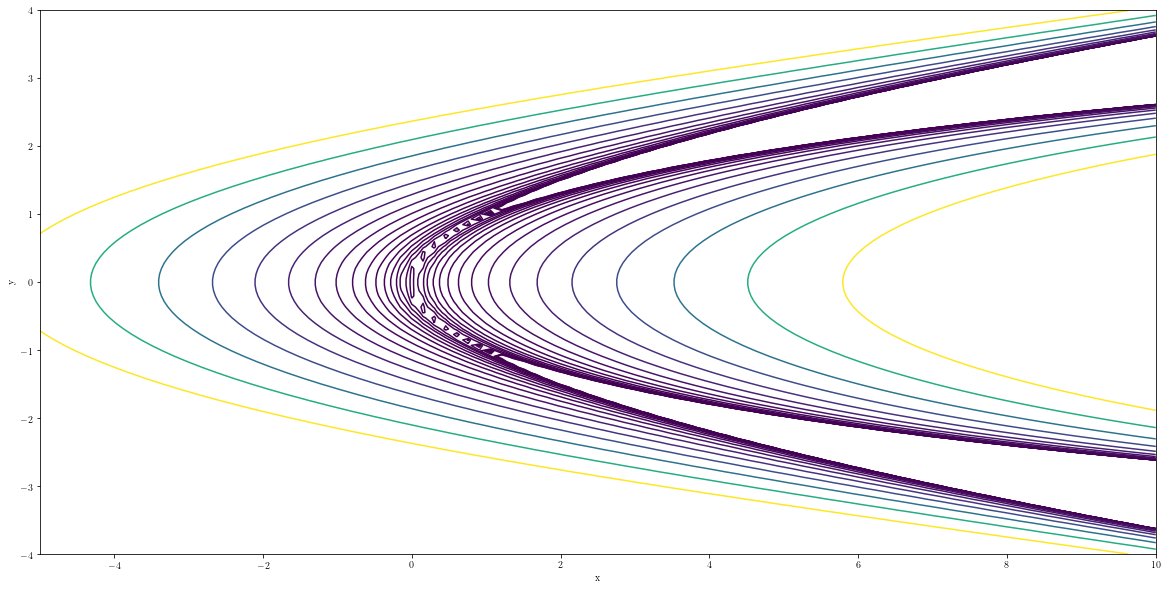

In [42]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x,y: (1-x**3)+100*(y**2-x)**2

n = 100 # number of discretization points along the x-axis
m = 100 # number of discretization points along the x-axis
a=-5; b=10 # extreme points in the x-axis
c=-4; d=4 # extreme points in the y-axis

X,Y = np.meshgrid(np.linspace(a,b,n),np.linspace(c,d,m))

Z = f(X,Y)

plt.figure(figsize=(20,10))
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
plt.xlabel('x')
plt.ylabel('y')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.show()

#### Pro2 - Q3

In [43]:
def df(point):
    x ,y = point[0], point[1]
    df_dx = -3*x**2-200*(y**2-x)
    df_dy = 400*(y**3-x*y)    
    return np.array([df_dx,df_dy])

def GradDescent(start=None, iterations=10, learning_rate=0.5):
    '''
    Parameters:
    f: objective function
    df: first derivatives regards to x and y
    '''
    if start:
        point = start
    else:
        point = np.random.uniform(-3,3,size=2)
    traj = [point]
    
    for i in range(iterations):
        grad = df(point)
        point = point - learning_rate*grad
        traj.append(point)
    return np.array(traj) 

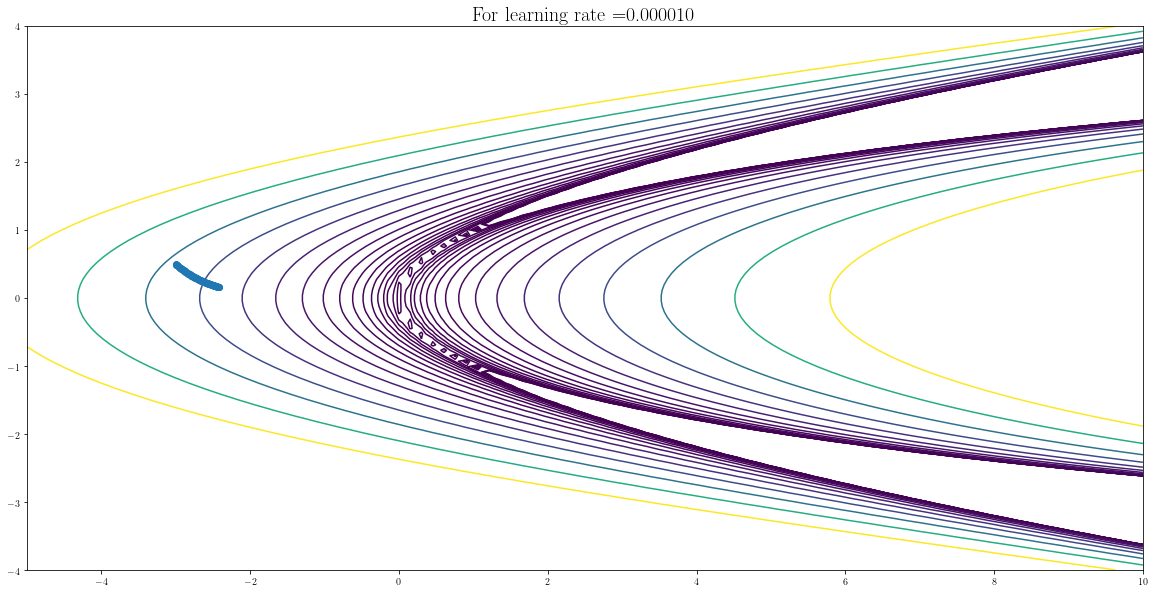

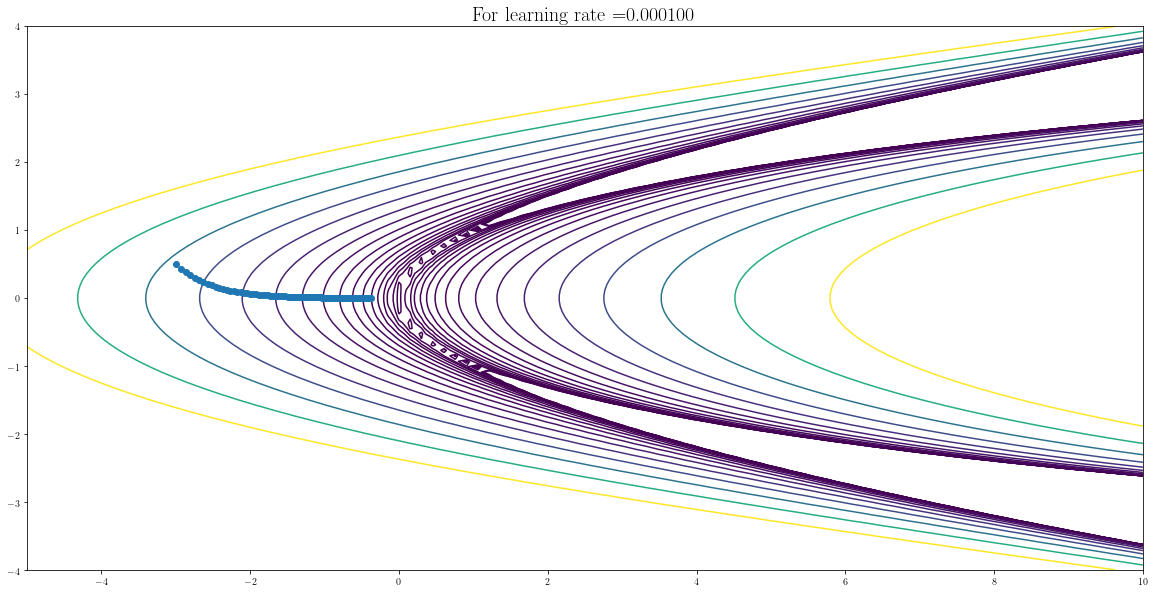

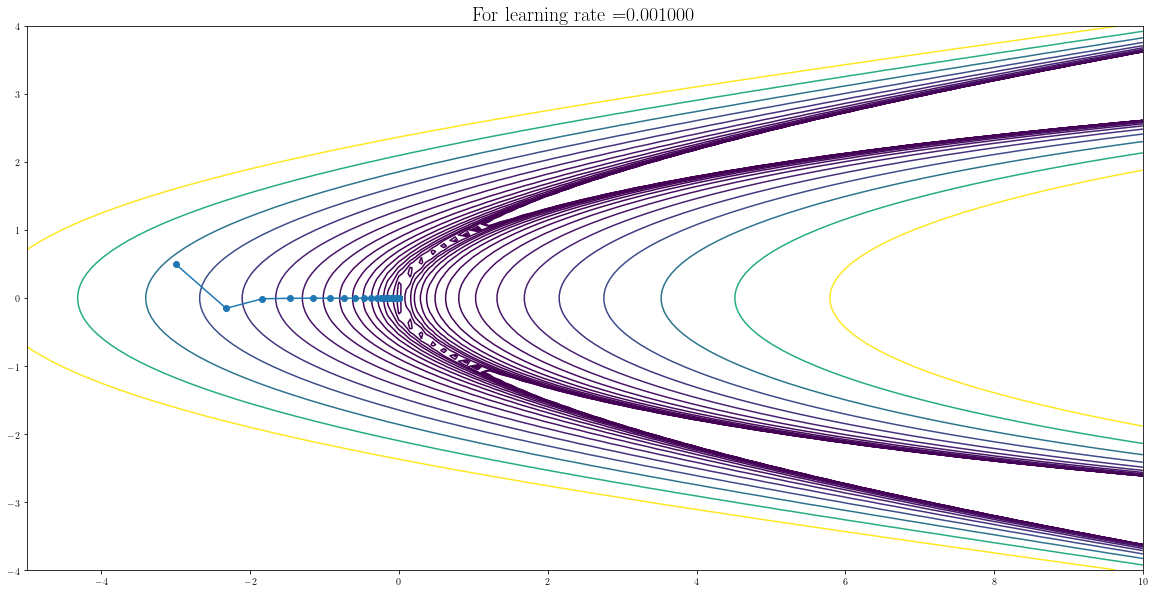

In [44]:
start = [-3,0.5]
rates = [1e-5,1e-4,1e-3]
for learning_rate in rates:
    traj = GradDescent(start, iterations=100,learning_rate=learning_rate)

    plt.figure(figsize=(20,10))
    plt.title('For learning rate =%f' %learning_rate, fontsize=20)
    plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')
    

#### Pro2 - Q4

In [45]:
def GradDescentMom(start=None, iterations=10, alpha=1e-1, epsilon = 10):
    '''
    Parameters:
    f: objective function
    df: first derivatives regards to x and y
    '''
    if start.size == 0:
        point = start
    else:
        point = np.random.uniform(-3,3,size=2)
    traj = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = df(point)
        v = alpha*v + epsilon*grad
        point = point - v
        traj.append(point)
    return np.array(traj) 

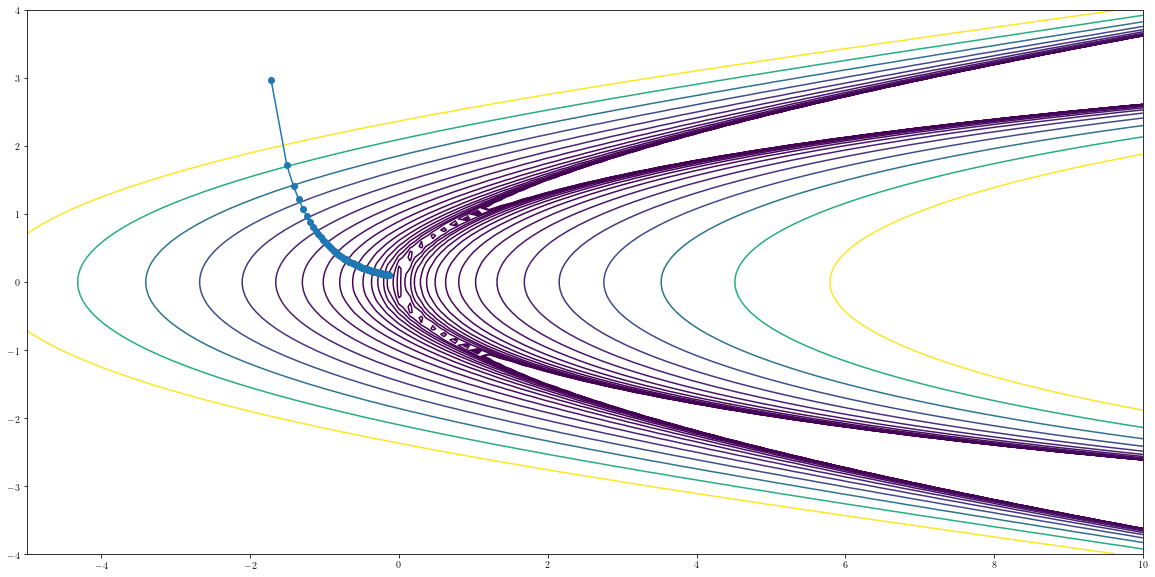

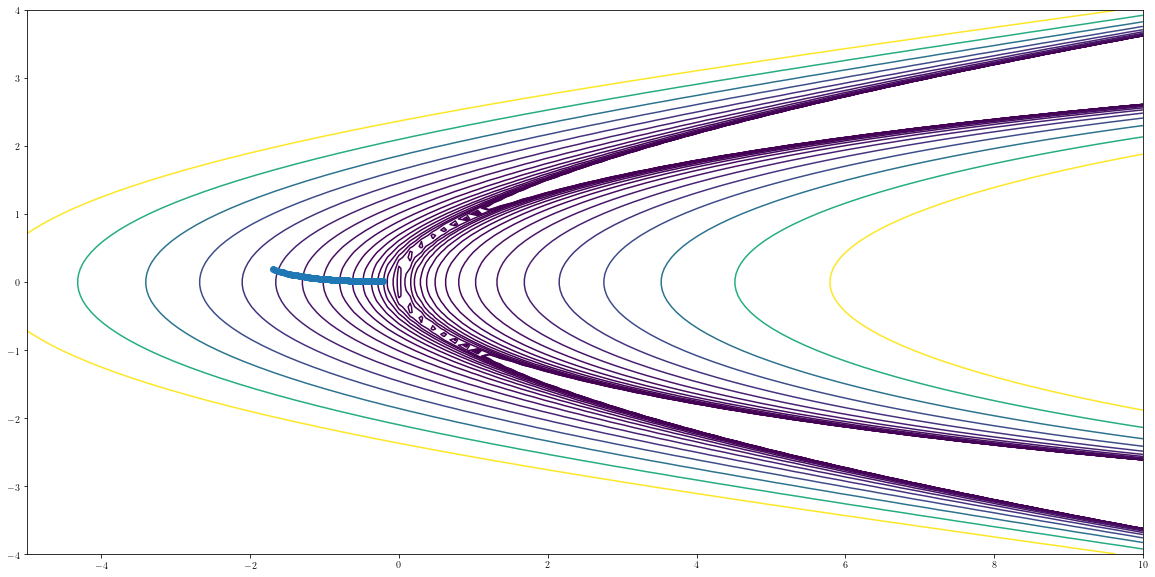

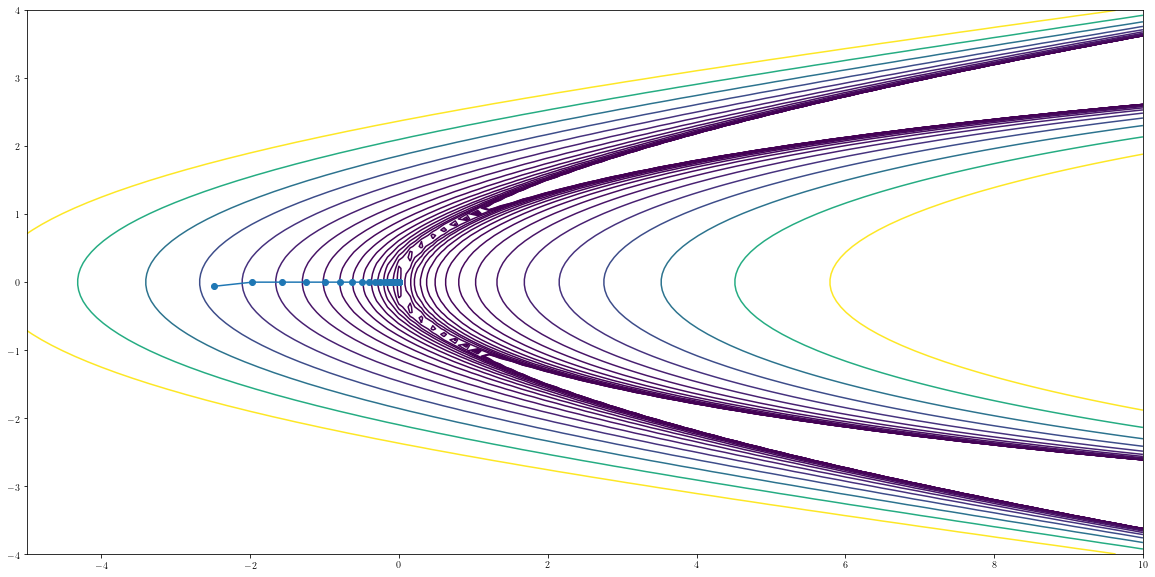

In [47]:
import random
random.seed(20) 
start = np.array([-3,0.5])
hyper_paras = np.array([[1e-4,1e-4],[1e-3,1e-4],[1e-4,1e-3]])
for i in range(len(hyper_paras)):
    traj = GradDescentMom(start, iterations=100,alpha=hyper_paras[i,0], epsilon = hyper_paras[i,1])

    plt.figure(figsize=(20,10))
    #plt.title('For alpha =%f, and epsilon= %f' %alpha %epsilon, fontsize=20)
    plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')
    

### Problem3
#### Pro3 - Q1

$$
f(h_1,h_2,h_3) = \frac{1}{1+e^{-(v_1h_1+v_2h_2+v_3h_3+c)}}, \\
where \ h_i = max(0,w_{1i}x_1+w_{2i}x_2+b_i) \ for\ all\ i=1,2,3
$$

Here, we choose cross entroy as our loss function:
$$
L(\hat y) = -y\log(\hat y) - (1-y)\log(1-\hat y)
$$
and, 
$$
\frac{\partial L}{\partial \hat y} = -\frac{y}{\hat y} + \frac{1-y}{1-\hat y}
$$

The ouput here is a sigmod function 
$$
\sigma(x) =\frac{1}{1+e^{-x}}
$$
and, 
$$
\frac{\partial \sigma(x)}{\partial x} = \sigma(x)(1-\sigma(x)) = \hat y(1-\hat y)
$$


Therefore, the derivatives for each parament are:

$$
\frac{\partial L}{\partial v_i} = (-\frac{y}{\hat y} + \frac{1-y}{1-\hat y})*\hat y(1-\hat y)*h_i
$$



$$
\frac{\partial L}{\partial w_{ji}} = (-\frac{y}{\hat y} + \frac{1-y}{1-\hat y})*\hat y(1-\hat y)*v_i*I(w_{1i}x_1+w_{2i}x_2+ b_i >0)*x_j
$$

$$
\frac{\partial L}{\partial b_{i}} = (-\frac{y}{\hat y} + \frac{1-y}{1-\hat y})*\hat y(1-\hat y)*v_i*I(w_{1i}x_1+w_{2i}x_2 + b_i >0)
$$

$$
\frac{\partial L}{\partial c} = (-\frac{y}{\hat y} + \frac{1-y}{1-\hat y})*\hat y(1-\hat y)
$$

for $i\in [1,2,3]$ and $j \in [1,2]$

To vectorize it, we have:
$$
{\bf X } =  \begin{bmatrix}
x_{11} & x_{12} & 1\\
... &...\\
x_{n1} & x_{n2} & 1
\end{bmatrix} 
$$
where, $n$ is the number of observation, ${\bf X } $ is a $n \times 3$ matrix

$$
{\bf W } =  \begin{bmatrix}
w_{11} & w_{12} & b_1\\
w_{21} & w_{22} & b_2\\
w_{31} & w_{32} & b_3
\end{bmatrix} 
$$
${\bf W }$ is a $3 \times 3$ matrix, and

$$
\frac{\partial L}{\partial \bf W } =  \begin{bmatrix}
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial b_1}\\
... & ... & ...\\
\frac{\partial L}{\partial w_{31}} & \frac{\partial L}{\partial w_{32}} & \frac{\partial L}{\partial b_3}
\end{bmatrix} 
$$

$$
{\bf V } =  \begin{bmatrix}
v_1 \\
v_2\\
v_3\\
c
\end{bmatrix}
$$
${\bf V }$ is a $4 \times 1$ matrix, and
$$
\frac{\partial L}{\partial \bf V } =  \begin{bmatrix}
\frac{\partial L}{\partial v_1} \\
\frac{\partial L}{\partial v_2}\\
\frac{\partial L}{\partial v_3}\\
\frac{\partial L}{\partial c}
\end{bmatrix}
$$

#### Pro3 - Q2

In [48]:
import numpy as np

# Define functions and their derivatives
L = lambda y,y_hat: -y.dot(np.log(y_hat)) - (1-y).dot(np.log(1-y_hat))
dL = lambda y,y_hat: -y.dot(1/y_hat) + (1-y).dot(1/(1-y_hat))
f = lambda H,V: 1/(1 + np.exp(-H.dot(V))) 
df_dV = lambda H,V: (H.T).dot(1/(1 + np.exp(-H.dot(V))) *(1 - 1/(1 + np.exp(-H.dot(V)))))
df_dH = lambda H,V: (1/(1 + np.exp(-H.dot(V))) *(1 - 1/(1 + np.exp(-H.dot(V))))).dot(V.T)

# derivatives for relu 
def dRelu(X,W_x):
    W_x = W_x.reshape(3,1)
    n = X.shape[0]
    m = W_x.shape[1]
    res = np.zeros((n,m))
    H_x = np.maximum(np.dot(X,W_x),np.zeros((n,m)))
    res[H_x>0]=1
    return res*X # elementwise multiplication

# define gradient descent function
def grad_f(X,Y, W_pad, V_pad):
    '''
    Parameters:
    X: n by 3 matrix, 2 input features with 1 padding value
    Y: the ground truth
    W_pad: 3 by 3 matrix with one padding column for bias term
    V_pad: 4 by 1 matrix with one padding row for bias term
    H_pad: the hidden layer, which is a n by 4 matrix with one padding column for bias term
    df, dL, dRelu: first derivatives for f,L and Relu
    '''
    
    # compute the hidden layer
    H = np.maximum(X.dot(W_pad),np.zeros((X.shape[0],3)))
    H_pad = np.concatenate((H,np.ones((X.shape[0],1))),axis=1)
    V = V_pad[:(V_pad.shape[0]-1),:]
    
    # compute the output layer
    y_hat = ff_nn_ReLu(X=X, W=W_pad, V=V_pad)
    
    # compute gradient descent for V and W  
    grad_V = dL(Y,y_hat)*df_dV(H_pad,V_pad)
    grad_H = dL(Y,y_hat)*df_dH(H,V) # Derivatives for H with no padding 
    #print(grad_H.shape)
    grad_W1 = np.average(grad_H[:,0].reshape(H.shape[0],1)*dRelu(X,W_pad[:,0]), axis = 0)
    grad_W2 = np.average(grad_H[:,1].reshape(H.shape[0],1)*dRelu(X,W_pad[:,1]), axis = 0)
    grad_W3 = np.average(grad_H[:,2].reshape(H.shape[0],1)*dRelu(X,W_pad[:,2]), axis = 0)
    grad_W = np.array([grad_W1,grad_W2,grad_W3])
    return grad_W,grad_V


#### Pro3 - Q3

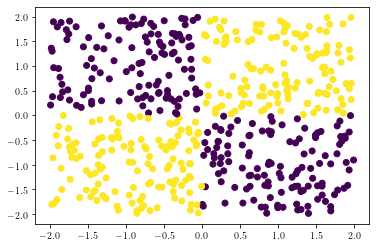

In [49]:
# Create data sets
X = np.random.uniform(-2,2,size=(512,2))
Y = np.zeros(512)
Y[np.logical_and(X[:,0]>0, X[:,1]>0)] = 1
Y[np.logical_and(X[:,0]<0, X[:,1]<0)] = 1
plt.scatter(X[:,0],X[:,1],c=Y)

#### Pro3 - Q4

In [50]:
def Backpro_GradDes(X,Y, W_pad=None, V_pad=None, iterations = 200, learning_rate = 1e-7):
    '''
    Parameters:
    X: n by 3 matrix, 2 input features with 1 padding value
    Y: the ground truth
    W_pad: 3 by 3 matrix with one padding column for bias term
    V_pad: 4 by 1 matrix with one padding row for bias term
    H_pad: the hidden layer, which is a n by 4 matrix with one padding column for bias term
    df, dL, dRelu: first derivatives for f,L and Relu
    '''
    random.seed(123)
    if W_pad is None:
        W_pad = np.random.uniform(-1,1,size = X.shape[1]*3).reshape(X.shape[1],3)
    if V_pad is None:
        V_pad = np.random.uniform(-1,1,size = 4).reshape(4,1)
    
    # computer loss
    y_hat = ff_nn_ReLu(X,W= W_pad, V=V_pad)
    loss = L(Y,y_hat)    
    loss_track = [loss]
    print(loss)
    
    # gradient descent
    for i in range(iterations):
        grad_W,grad_V = grad_f(X,Y, W_pad, V_pad)
        W_pad = W_pad - learning_rate*grad_W
        V_pad = V_pad - learning_rate*grad_V
        y_hat = ff_nn_ReLu(X,W= W_pad, V=V_pad)
        loss = L(Y,y_hat) 
        loss_track.append(loss)
    return np.array(loss_track), W_pad,V_pad 
   

In [57]:
X_pad = np.concatenate((X,np.ones((X.shape[0],1))),axis = 1) # paddding 1 column for bias
loss_track, W_pad,V_pad = Backpro_GradDes(X_pad,Y)
#print(loss_track)

452.1641256107846


Text(0.5, 0, 'Iteration')

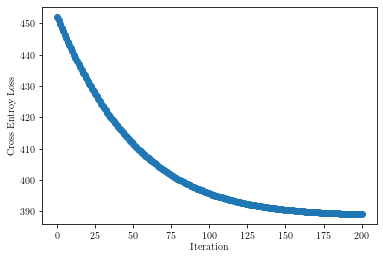

In [58]:
plt.plot(loss_track,'o')
plt.ylabel("Cross Entroy Loss")
plt.xlabel("Iteration")

#### Pro3 - Q5

In [60]:
def Backpro_GradDeswithMomentum(X,Y, W_pad=None, V_pad=None, iterations = 200, 
                                alpha=1e-3, epsilon =1e-7):
    '''
    Parameters:
    X: n by 3 matrix, 2 input features with 1 padding value
    Y: the ground truth
    W_pad: 3 by 3 matrix with one padding column for bias term
    V_pad: 4 by 1 matrix with one padding row for bias term
    H_pad: the hidden layer, which is a n by 4 matrix with one padding column for bias term
    df, dL, dRelu: first derivatives for f,L and Relu
    '''
    random.seed(123)
    if W_pad is None:
        W_pad = np.random.uniform(-1,1,size = X.shape[1]*3).reshape(X.shape[1],3)
    if V_pad is None:
        V_pad = np.random.uniform(-1,1,size = 4).reshape(4,1)
    
    # computer loss
    y_hat = ff_nn_ReLu(X,W= W_pad, V=V_pad)
    loss = L(Y,y_hat)    
    loss_track = [loss]
    print(loss)
    
    # gradient descent
    for i in range(iterations):
        grad_W,grad_V = grad_f(X,Y, W_pad, V_pad)
        W_pad = W_pad - (W_pad*alpha + epsilon*grad_W)
        V_pad = V_pad - (V_pad*alpha + epsilon*grad_V)
        y_hat = ff_nn_ReLu(X,W= W_pad, V=V_pad)
        loss = L(Y,y_hat) 
        loss_track.append(loss)
    return np.array(loss_track),W_pad,V_pad
   

434.13601939460546


Text(0.5, 0, 'Iteration')

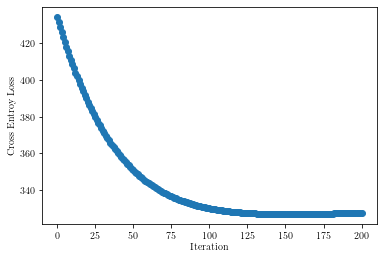

In [75]:
loss_track_Mon, W_padMon,V_padMon = Backpro_GradDeswithMomentum(X_pad,Y)
# print(loss_track_Mon)
plt.plot(loss_track_Mon,'o')
plt.ylabel("Cross Entroy Loss")
plt.xlabel("Iteration")

#### Pro3 - Q6

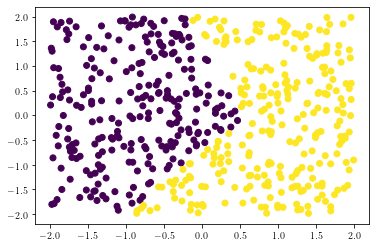

In [117]:
y_pred = ff_nn_ReLu(X_pad,W= W_padMon, V=V_padMon)
y_pred[y_pred >0.5] = 1
y_pred[y_pred <= 0.5] = 0
#plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(X[:,0],X[:,1],c= y_pred)

In [130]:
def plot_decision_boundary(X, Y,W, V):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_boundary=np.array([xx.ravel(), yy.ravel()]).T
    X_boundary = np.concatenate((X_boundary, np.ones((X_boundary.shape[0],1))),axis = 1)
    y_pred = ff_nn_ReLu(X_boundary,W,V)
    y_pred = y_pred >0.5
    y_pred = y_pred.reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=Y)

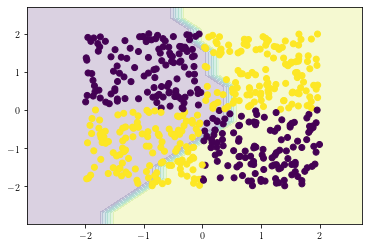

In [131]:
plot_decision_boundary(X, Y,W_padMon, V_padMon)